In [1]:
# importing required libraries
import dowhy
from dowhy import CausalModel
import pandas as pd
import numpy as np

d:\LAM_SRM\SCM_DoWhy\DoWhy_EconML\econml_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data= pd.read_csv("https://raw.githubusercontent.com/AMLab-Amsterdam/CEVAE/master/datasets/IHDP/csv/ihdp_npci_1.csv", header = None)
col =  ["treatment", "y_factual", "y_cfactual", "mu0", "mu1" ,]
for i in range(1,26):
    col.append("x"+str(i))
data.columns = col
data = data.astype({"treatment":'bool'}, copy=False)
data.head()

,treatment,y_factual,y_cfactual,mu0,mu1,x1,x2,x3,x4,x5,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25
0,True,5.599916,4.318780,3.268256,6.854457,-0.528603,-0.343455,1.128554,0.161703,-0.316603,...,1,1,1,1,0,0,0,0,0,0
1,False,6.875856,7.856495,6.636059,7.562718,-1.736945,-1.802002,0.383828,2.244320,-0.629189,...,1,1,1,1,0,0,0,0,0,0
2,False,2.996273,6.633952,1.570536,6.121617,-0.807451,-0.202946,-0.360898,-0.879606,0.808706,...,1,0,1,1,0,0,0,0,0,0
3,False,1.366206,5.697239,1.244738,5.889125,0.390083,0.596582,-1.850350,-0.879606,-0.004017,...,1,0,1,1,0,0,0,0,0,0
4,False,1.963538,6.202582,1.685048,6.191994,-1.045229,-0.602710,0.011465,0.161703,0.683672,...,1,1,1,1,0,0,0,0,0,0


In [3]:
print(data)

     treatment  y_factual  y_cfactual       mu0       mu1        x1        x2  \
0         True   5.599916    4.318780  3.268256  6.854457 -0.528603 -0.343455   
1        False   6.875856    7.856495  6.636059  7.562718 -1.736945 -1.802002   
2        False   2.996273    6.633952  1.570536  6.121617 -0.807451 -0.202946   
3        False   1.366206    5.697239  1.244738  5.889125  0.390083  0.596582   
4        False   1.963538    6.202582  1.685048  6.191994 -1.045229 -0.602710   
..         ...        ...         ...       ...       ...       ...       ...   
742      False   4.091946    6.061976  3.986826  7.053195 -0.007654 -0.202946   
743       True   5.501677    4.237157  4.111877  7.084080  0.727295 -0.202946   
744      False   1.842583    4.949537  2.346736  6.523225  1.181234  0.196818   
745      False   3.076368    7.554212  2.114661  6.419095 -0.288664 -0.202946   
746      False   2.928105    5.311445  2.763235  6.686602 -0.137351  0.596582   

           x3        x4    

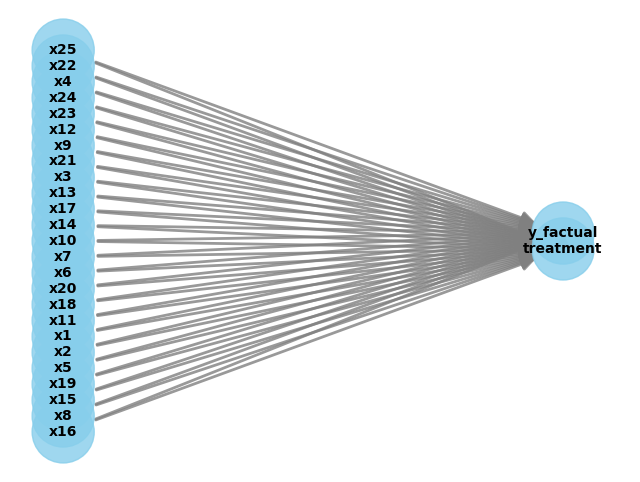

In [6]:
# Create a causal model from the data and given common causes.
model=CausalModel(
        data = data,
        treatment='treatment',
        outcome='y_factual',
        common_causes=["x"+str(i) for  i in range(1,26)]
        )
model.view_model()
from IPython.display import Image, display
#display(Image(filename="causal_model.png"))

In [7]:
#Identify the causal effect
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True, method_name="maximal-adjustment")
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(E[y_factual|x16,x8,x15,x19,x5,x2,x1,x11,x18,x20,x6,x7,x10,x14,x17
d[treatment]                                                                  

                                       
,x13,x3,x21,x9,x12,x23,x24,x4,x22,x25])
                                       
Estimand assumption 1, Unconfoundedness: If U→{treatment} and U→y_factual then P(y_factual|treatment,x16,x8,x15,x19,x5,x2,x1,x11,x18,x20,x6,x7,x10,x14,x17,x13,x3,x21,x9,x12,x23,x24,x4,x22,x25,U) = P(y_factual|treatment,x16,x8,x15,x19,x5,x2,x1,x11,x18,x20,x6,x7,x10,x14,x17,x13,x3,x21,x9,x12,x23,x24,x4,x22,x25)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [8]:
# Estimate the causal effect and compare it with Average Treatment Effect
estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression", test_significance=True
)

print(estimate)

print("Causal Estimate is " + str(estimate.value))
data_1 = data[data["treatment"]==1]
data_0 = data[data["treatment"]==0]

print("ATE", np.mean(data_1["y_factual"])- np.mean(data_0["y_factual"]))


*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(E[y_factual|x16,x8,x15,x19,x5,x2,x1,x11,x18,x20,x6,x7,x10,x14,x17
d[treatment]                                                                  

                                       
,x13,x3,x21,x9,x12,x23,x24,x4,x22,x25])
                                       
Estimand assumption 1, Unconfoundedness: If U→{treatment} and U→y_factual then P(y_factual|treatment,x16,x8,x15,x19,x5,x2,x1,x11,x18,x20,x6,x7,x10,x14,x17,x13,x3,x21,x9,x12,x23,x24,x4,x22,x25,U) = P(y_factual|treatment,x16,x8,x15,x19,x5,x2,x1,x11,x18,x20,x6,x7,x10,x14,x17,x13,x3,x21,x9,x12,x23,x24,x4,x22,x25)

## Realized estimand
b: y_factual~treatment+x16+x8+x15+x19+x5+x2+x1+x11+x18+x20+x6+x7+x10+x14+x17+x13+x3+x21+x9+x12+x23+x24+x4+x22+x25
Target units: ate

## Estimate
Mean va

d:\LAM_SRM\SCM_DoWhy\DoWhy_EconML\econml_env\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
